# Proyek Analisis Data: Bike Sharing Dataset
- Nama: elba.faradisa@gmail.com
- Email: elba.faradisa@gmail.com
- Id Dicoding: EYX4Y921OZDL

## Menentukan Pertanyaan Bisnis

- Bagimana performa jumlah sewa sepeda dalam satu tahun terakhir?
- Kapan orang-orang paling banyak menggunakan sewa sepeda?
- Berapa jam waktu yang paling banyak dihabiskan oleh user menggunakan sewa sepeda?
- Bagaimana jumlah user sewa sepeda berdasarkan jenis keanggotaannya? 

## Menyiapkan semua library yang dibutuhkan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
# Load day dataset
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# Load hour dataset
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Data Day

In [5]:
# Informasi day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan informasi di atas, data day tidak memiliki missing value karena jumlah data dari setiap fitur sama. Akan tetapi terdapat kesalahan tipe data yaitu pada fitur `dteday` dimana seharusnya memiliki tipe data datetime karena berisikan data berupa waktu, bukan object.

In [6]:
# Mengecek data duplikat day_df
day_df.duplicated().sum()

0

Tidak ada duplikat pada data day.

In [7]:
# Parameter statistik day_df
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Berdasarkan parameter statistik di atas, terdapat keanehan pada fitur `hum` atau *humidity* dimana nilai maksimumnya bernilai nol. *Humidity* atau kelembapan adalah tingkat keadaan lingkungan udara basah yang disebabkan oleh adanya uap air. Uap air selalu ada di udara sehingga tidak mungkin bernilai nol.

#### Data hour

In [8]:
# Informasi hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan informasi di atas, data hour tidak memiliki missing value karena jumlah data dari setiap fitur sama. Akan tetapi terdapat kesalahan tipe data juga yaitu pada fitur `dteday` dimana seharusnya memiliki tipe data datetime, bukan object.

In [9]:
# Mengecek data duplikat hour_df
hour_df.duplicated().sum()

0

Tidak ada duplikat pada data hour.

In [10]:
# Parameter statistik hour_df
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Berdasarkan parameter statistik di atas, terdapat kenaehan pada beberapa nilai minimum dari fitur `atemp`, `hum`, dan `windspeed` yang bernilai nol.

In [11]:
# Fitur atemp yang bernilai nol
hour_df[hour_df['atemp']==0]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
480,481,2011-01-22,1,0,1,1,0,6,0,2,0.04,0.0,0.41,0.3881,3,9,12
486,487,2011-01-22,1,0,1,8,0,6,0,1,0.02,0.0,0.44,0.3284,1,26,27


Berdasarkan data di atas, tidak mungkin pada saat musim 1 yaitu musim semi memiliki suhu 0 celcius. Hal ini mungkin terjadi karena *inaccurate value*.

In [12]:
# Fitur humidity yang bernilai nol
hour_df[hour_df['hum']==0]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1551,1552,2011-03-10,1,0,3,0,0,4,1,3,0.34,0.3182,0.0,0.2537,3,0,3
1552,1553,2011-03-10,1,0,3,1,0,4,1,3,0.34,0.3182,0.0,0.2537,0,2,2
1553,1554,2011-03-10,1,0,3,2,0,4,1,3,0.34,0.3182,0.0,0.2537,0,1,1
1554,1555,2011-03-10,1,0,3,5,0,4,1,3,0.36,0.3485,0.0,0.1940,1,2,3
1555,1556,2011-03-10,1,0,3,6,0,4,1,3,0.36,0.3333,0.0,0.3284,0,12,12
1556,1557,2011-03-10,1,0,3,7,0,4,1,3,0.38,0.3939,0.0,0.2239,1,36,37
1557,1558,2011-03-10,1,0,3,8,0,4,1,3,0.38,0.3939,0.0,0.2836,1,43,44
1558,1559,2011-03-10,1,0,3,9,0,4,1,3,0.40,0.4091,0.0,0.2239,1,23,24
1559,1560,2011-03-10,1,0,3,10,0,4,1,3,0.40,0.4091,0.0,0.1642,0,17,17
1560,1561,2011-03-10,1,0,3,11,0,4,1,3,0.40,0.4091,0.0,0.2537,6,5,11


Humidity* atau kelembapan adalah tingkat keadaan lingkungan udara basah yang disebabkan oleh adanya uap air. Uap air selalu ada di udara sehingga tidak mungkin bernilai nol. Berdasarkan data di atas terdapat nilai nol pada fitur `hum`, hal tersebut bisa terjadi karena *inaccurate value*.

In [13]:
# Fitur windspeed yang bernilai nol
hour_df[hour_df['windspeed']==0]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17319,17320,2012-12-29,1,1,12,12,0,6,0,3,0.20,0.2424,1.00,0.0,5,43,48
17320,17321,2012-12-29,1,1,12,13,0,6,0,3,0.20,0.2424,1.00,0.0,13,71,84
17322,17323,2012-12-29,1,1,12,15,0,6,0,2,0.24,0.2424,0.87,0.0,19,110,129
17330,17331,2012-12-29,1,1,12,23,0,6,0,2,0.26,0.2424,0.60,0.0,0,32,32


Angin selalu ada karena adanya perbedaan suhu dan tekanan udara sehingga kecepatannya tidak akan sama dengan nol. Pada data di atas, terdapat fitur `windspeed` bernilai nol, hal tersebut terjadi karena *inaccurate value*.

### Cleaning Data

#### Data day

In [14]:
# Mengubah tipe data fitur dteday menjadi datetime
day_df['dteday'] = day_df['dteday'].astype('datetime64[ns]')

In [15]:
# Informasi day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Berdasarkan informasi di atas, terlihat bahwa fitur `dteday` sudah memiliki tipe data datetime.

In [16]:
# Inaccurate value pada fitur hum
day_df[day_df['hum']==0]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.0,0.261877,46,577,623


Terdapat satu baris data yang memiliki value nol pada fitur `hum`. Value tersebut akan diganti menggunakan rata-ratanya dengan pertimbangan bahwa data pada fitur `hum` memiliki distribusi yang mendekati normal karena memiliki mean, median, dan modus yang hampir sama yaitu 0.6.

In [17]:
# Menangani inaccurate value
day_df['hum'].replace(day_df['hum'].min(), day_df['hum'].median(), inplace=True)

In [18]:
# Mengecek nilai minimum pada fitur hum
day_df['hum'].min()

0.187917

Berdasarkan informasi di atas, terlihat bahwa sekarang nilai minimum dari fitur `hum` sudah tidak bernilai nol.

#### Data hour

In [19]:
# Mengubah tipe data dateday menjati datetime
hour_df['dteday'] = hour_df['dteday'].astype('datetime64[ns]')

In [20]:
# Informasi hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Berdasarkan informasi di atas, terlihat bahwa fitur `dteday` sudah memiliki tipe data datetime.

In [21]:
# Inaccurate value pada fitur atemp
hour_df[hour_df['atemp']==0]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
480,481,2011-01-22,1,0,1,1,0,6,0,2,0.04,0.0,0.41,0.3881,3,9,12
486,487,2011-01-22,1,0,1,8,0,6,0,1,0.02,0.0,0.44,0.3284,1,26,27


Terdapat dua baris data yang memiliki value nol pada fitur `atemp`. Nilai tersebut akan diganti menggunakan nilai median dengan pertimbangan bahwa data pada fitur `atemp` tidak berdistribusi normal karena memiliki nilai modus yang berbeda dengan mean dan median.

In [22]:
# Menangani inaccurate value pada fitur atemp
hour_df['atemp'].replace(hour_df['atemp'].min(), hour_df['atemp'].median(), inplace=True)

In [23]:
# Mengecek kembali nilai minimum dari fitur atemp
hour_df['atemp'].min()

0.0152

Berdasarkan informasi di atas, terlihat bahwa nilai minimum dari fitur `atemp` bukan nilai nol.

In [24]:
# Inaccurate value pada fitur hum
hour_df[hour_df['hum']==0]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1551,1552,2011-03-10,1,0,3,0,0,4,1,3,0.34,0.3182,0.0,0.2537,3,0,3
1552,1553,2011-03-10,1,0,3,1,0,4,1,3,0.34,0.3182,0.0,0.2537,0,2,2
1553,1554,2011-03-10,1,0,3,2,0,4,1,3,0.34,0.3182,0.0,0.2537,0,1,1
1554,1555,2011-03-10,1,0,3,5,0,4,1,3,0.36,0.3485,0.0,0.1940,1,2,3
1555,1556,2011-03-10,1,0,3,6,0,4,1,3,0.36,0.3333,0.0,0.3284,0,12,12
1556,1557,2011-03-10,1,0,3,7,0,4,1,3,0.38,0.3939,0.0,0.2239,1,36,37
1557,1558,2011-03-10,1,0,3,8,0,4,1,3,0.38,0.3939,0.0,0.2836,1,43,44
1558,1559,2011-03-10,1,0,3,9,0,4,1,3,0.40,0.4091,0.0,0.2239,1,23,24
1559,1560,2011-03-10,1,0,3,10,0,4,1,3,0.40,0.4091,0.0,0.1642,0,17,17
1560,1561,2011-03-10,1,0,3,11,0,4,1,3,0.40,0.4091,0.0,0.2537,6,5,11


Terdapat 22 baris data yang memiliki value nol pada fitur `hum`. Nilai tersebut akan diganti menggunakan nilai median dengan pertimbangan bahwa data pada fitur `hum` tidak berdistribusi normal karena memiliki nilai modus yang berbeda dengan mean dan median.

In [25]:
# Menangani inaccurate value pada fitur hum
hour_df['hum'].replace(hour_df['hum'].min(), hour_df['atemp'].median(), inplace=True)

In [26]:
# Mengecek kembali nilai minimum dari fitur hum
hour_df['hum'].min()

0.08

Terlihat bahwa nilai minimum dari fitur `hum` sudah bukan nilai nol.

In [27]:
# Inaccurate value pada fitur windspeed
hour_df[hour_df['windspeed']==0]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17319,17320,2012-12-29,1,1,12,12,0,6,0,3,0.20,0.2424,1.00,0.0,5,43,48
17320,17321,2012-12-29,1,1,12,13,0,6,0,3,0.20,0.2424,1.00,0.0,13,71,84
17322,17323,2012-12-29,1,1,12,15,0,6,0,2,0.24,0.2424,0.87,0.0,19,110,129
17330,17331,2012-12-29,1,1,12,23,0,6,0,2,0.26,0.2424,0.60,0.0,0,32,32


Terdapat 2180 baris data yang memiliki value nol pada fitur `windspeed`. Nilai tersebut akan diganti menggunakan nilai median dengan pertimbangan bahwa data pada fitur `windspeed` tidak berdistribusi normal karena memiliki nilai modus yang berbeda dengan mean dan median.

In [28]:
# Menangani inaccurate value pada fitur windspeed
hour_df['windspeed'].replace(hour_df['windspeed'].min(), hour_df['windspeed'].median(), inplace=True)

In [29]:
# Mengecek kembali nilai minimum dari fitur windspeed
hour_df['windspeed'].min()

0.0896

Terlihat bahwa nilai minimum dari fitur `windspeed` sudah bukan nilai nol.

In [30]:
# Menyimpan data day_df yang sudah bersih
day_df.to_pickle('cleaned_day_df.csv')

In [31]:
# Menyimpan data hour_df yang sudah bersih
hour_df.to_pickle('cleaned_hour_df.csv')

Dataframe dari day_df dan hour_df memiliki isi yang sama hanya terdapat perbedaan satu fitur `hr` yaitu hour yang hanya dimiliki oleh hour_df. Oleh karena itu day_df dan hour_df tidak akan digabungkan datanya.

## Exploratory Data Analysis (EDA)

#### Data Day

In [32]:
# Parameter statistik
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628751,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.140518,0.077498,686.622488,1560.256377,1937.211452


Berdasarkan parameter statistik di atas, rata-rata jumlah user rental sepeda dalam sehari adalah 4504 orang dengan standar deviasi 1937 orang. Adapun jumlah minimal user dalam sehari adalah 22 orang dan jumlah maksimalnya 8714 orang.

In [33]:
# Melihat jumlah user berdasarkan musim
day_df.groupby('season').agg({
   'casual' : 'sum',
   'registered' : 'sum',
   'cnt' : 'sum'
}).sort_values(by='cnt', ascending=False)

,casual,registered,cnt
season,,,
3,226091,835038,1061129
2,203522,715067,918589
4,129782,711831,841613
1,60622,410726,471348


Berdasarkan tabel di atas, user sewa sepeda paling banyak ada pada musim 3 yaitu musim gugur dan didominasi oleh jenis user *registered*. 

In [34]:
# Melihat jumlah user berdasarkan holiday
day_df.groupby('holiday').agg({
   'casual' : 'sum',
   'registered' : 'sum',
   'cnt' : 'sum'
}).sort_values(by='cnt', ascending=False)

,casual,registered,cnt
holiday,,,
0,597658,2616586,3214244
1,22359,56076,78435


Berdasarkan tabel di atas, sewa sepeda paling banyak digunakan saat bukan holiday yaitu sebanyak 3214244 orang, yang didominasi oleh user *registered* ,sedangkan saat holiday hanya 78435 orang. Hal ini menunjukkan kemungkinana banyaknya rental sepeda tidak digunakan untuk bermain atau berlibur.

In [35]:
# Melihat jumlah user berdasarkan weekday
day_df.groupby('weekday').agg({
   'casual' : 'sum',
   'registered' : 'sum',
   'cnt' : 'sum'
}).sort_values(by='cnt', ascending=False)

,casual,registered,cnt
weekday,,,
5,78238,409552,487790
4,61460,423935,485395
6,153852,323955,477807
3,57319,415729,473048
2,57843,411266,469109
1,70784,384719,455503
0,140521,303506,444027


Dilihat dari tabel di atas, jumlah user sewa sepeda tidak berbeda jauh berdasarkan harinya. Hal ini menunjukkan jumlah sewa sepeda tersebar secara merata berdasarkan harinya. Akan tetapi pada akhir pekan yaitu hari Sabtu dan Minggu, jumlah user sewa sepeda sedikit lebih banyak dibandingkan hari lainnya.

In [36]:
# Melihat jumlah user berdasarkan workingday
day_df.groupby('workingday').agg({
   'casual' : 'sum',
   'registered' : 'sum',
   'cnt' : 'sum'
}).sort_values(by='cnt', ascending=False)

,casual,registered,cnt
workingday,,,
1,303285,1989125,2292410
0,316732,683537,1000269


Berdasarkan tabel di atas, jumlah user sewa sepeda paling banyak dilakukan pada hari kerja yang didominasi oleh user *registered*. Hal ini menunjukkan kemungkinan banyaknya user yang menggunakan sewa sepeda adalah user yang bekerja.

In [37]:
# Melihat jumlah user berdasarkan weathersit
day_df.groupby('weathersit').agg({
   'casual' : 'sum',
   'registered' : 'sum',
   'cnt' : 'sum'
}).sort_values(by='cnt', ascending=False)

,casual,registered,cnt
weathersit,,,
1,446346,1811606,2257952
2,169776,827082,996858
3,3895,33974,37869


Berdasarkan tabel di atas, jumlah user sewa sepeda paling banyak dilakukan pada saat cuaca cerah atau berawan dan didominasi oleh user *registered*.

#### Data Hour

In [38]:
# Parameter statistik
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475831,0.627843,0.214433,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.015200,0.080000,0.089600,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.134300,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171774,0.191701,0.099215,49.305030,151.357286,181.387599


Berdasarkan parameter statistik di atas, rata-rata user menggunakan rental sepeda adalah 11,5 jam dengan standar deviasi 6,9 jam. Adapun waktu maksimal rental sepeda yang digunakan user adalah 23 jam, sedangkan waktu minimalnya adalah 0 jam. Untuk waktu 0 jam bisa diartikan user menggunakan rental sepeda kurang dari satu jam.

In [39]:
hour_df.groupby('hr').agg({
   'casual' : 'sum',
   'registered' : 'sum',
   'cnt' : 'sum'
}).sort_values(by='cnt', ascending=False)

,casual,registered,cnt
hr,,,
17,54220,282640,336860
18,44496,265276,309772
8,15761,245240,261001
16,53834,173914,227748
19,35505,191284,226789
13,52713,132206,184919
12,49718,134696,184414
15,54606,128543,183149
14,55089,120563,175652


Berdasarkan tabel di atas, user paling banyak menggunakan sewa sepeda selama 17 dan 18 jam dan didominasi oleh user *registerd*.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagimana performa jumlah sewa sepeda dalam satu tahun terakhir?

In [40]:
# Membuat dataframe jumlah user keseluruhan per bulan
daily_rent = day_df[day_df['dteday'].dt.year==2012]
monthly_rent = daily_rent.resample(rule='M', on='dteday').agg({
   'cnt' :'sum'
})
monthly_rent.index = monthly_rent.index.strftime('%B')
monthly_rent = monthly_rent.reset_index()
monthly_rent = monthly_rent.rename(columns={
   'dteday': 'Month',
   'cnt': 'number_of_user'
})
monthly_rent

,Month,number_of_user
0,January,96744
1,February,103137
2,March,164875
3,April,174224
4,May,195865
5,June,202830
6,July,203607
7,August,214503
8,September,218573
9,October,198841


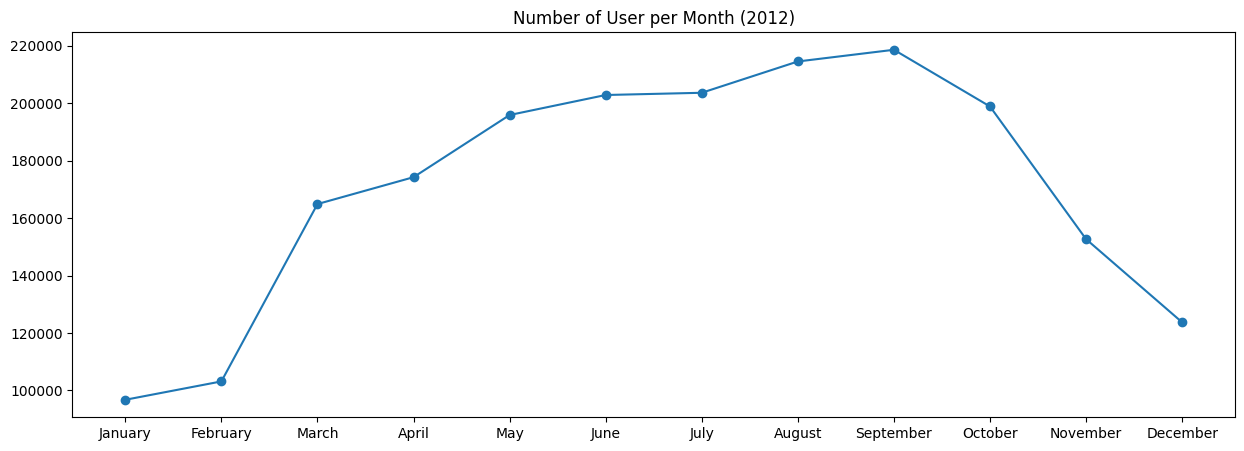

In [41]:
# Membuat plot jumlah user setiap bulan
plt.figure(figsize=(15,5))
plt.plot(monthly_rent['Month'], monthly_rent['number_of_user'], marker='o')
plt.title('Number of User per Month (2012)')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Berdasarkan grafik di atas, jumlah user rental sepeda secara keseluruhan satu tahun terakhir paling banyak ada di bulan September. Kemudian terjadi perunanan jumlah user di bulan Oktober sampai Desember.

In [42]:
# Membuat dataframe jumlah user berdasarkan jenis keanggotaan per bulan
monthly_rent = daily_rent.resample(rule='M', on='dteday').agg({
   'casual' :'sum',
   'registered' : 'sum'
})
monthly_rent.index = monthly_rent.index.strftime('%B')
monthly_rent = monthly_rent.reset_index()
monthly_rent = monthly_rent.rename(columns={
   'dteday': 'Month',
   'casual': 'count_user_casual',
   'registered' : 'count_user_registered'
})
monthly_rent

,Month,count_user_casual,count_user_registered
0,January,8969,87775
1,February,8721,94416
2,March,31618,133257
3,April,38456,135768
4,May,44235,151630
5,June,43294,159536
6,July,41705,161902
7,August,43197,171306
8,September,43778,174795
9,October,34538,164303


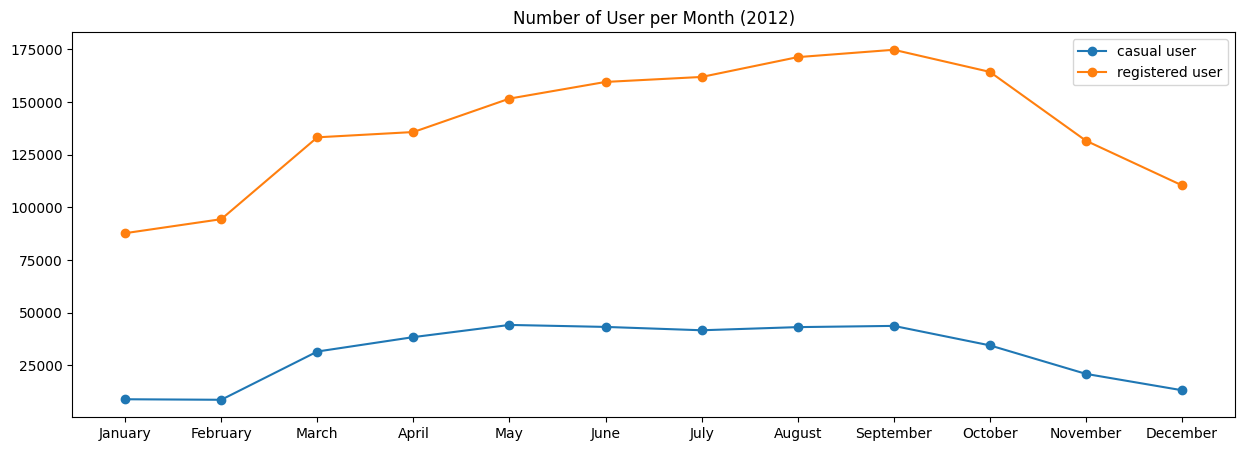

In [43]:
# Membuat plot jumlah user berdasarkan jenisnya setiap bulan
plt.figure(figsize=(15,5))
plt.plot(monthly_rent['Month'], monthly_rent['count_user_casual'], marker='o', label= 'casual user')
plt.plot(monthly_rent['Month'], monthly_rent['count_user_registered'], marker='o', label= 'registered user')
plt.title('Number of User per Month (2012)')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
plt.show()

Berdasarkan grafik di atas, terlihat bahwa jumlah *registered user* setiap bulannya selalu lebih banyak dibandingkan jumlah  *casual user*. Kemudian untuk *casual user* maupun *registerd user*, jumlah user paling banyak juga ada di bulan September dan terjadi penurunan di bulan Oktober sampai Desember.

### Pertanyaan 2: Kapan orang-orang paling banyak menggunakan sewa sepeda?

### Berdasarkan musim

In [44]:
# Membuat dataframe jumlah user berdasarkan musim
day_df = day_df.replace({'season' : {1 : 'Spring', 2 : 'Summer', 3 : 'Fall', 4 : 'Winter'}})
by_season = day_df.groupby('season').cnt.sum().reset_index()
by_season.rename(columns={
   'cnt' : 'number_of_user'
}, inplace=True)
by_season

,season,number_of_user
0,Fall,1061129
1,Spring,471348
2,Summer,918589
3,Winter,841613


/var/folders/3n/jyv3jbjd2pb7zyf7y1f5j9xm0000gn/T/ipykernel_46776/1330949651.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='number_of_user', data=by_season.sort_values('number_of_user', ascending=False), palette=colors)


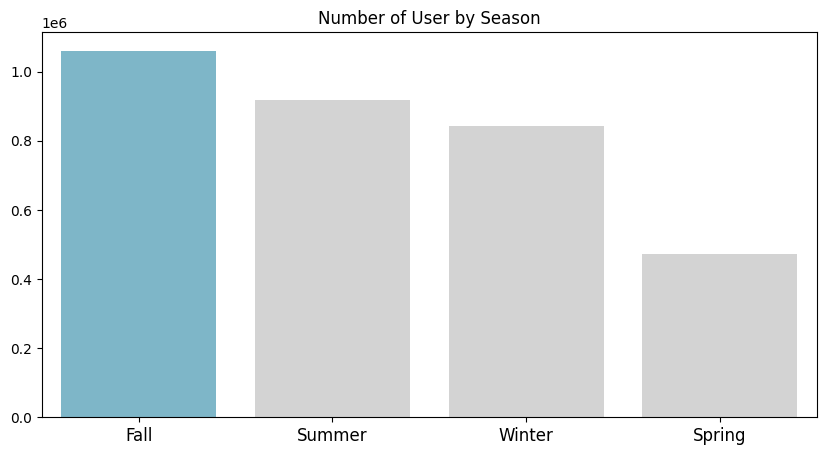

In [45]:
# Membuat plot jumlah user berdasarkan musim
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
plt.figure(figsize=(10,5))
sns.barplot(x='season', y='number_of_user', data=by_season.sort_values('number_of_user', ascending=False), palette=colors)
plt.title('Number of User by Season')
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Berdasarkan grafik di atas dapat dilihat bahwa jumlah user rental sepeda paling banyak ada di musim gugur.

### Berdasarkan holiday

In [46]:
# # Membuat dataframe jumlah user berdasarkan holiday
day_df = day_df.replace({'holiday' : {0 : 'Not holiday', 1 : 'Holiday'}})
by_holiday = day_df.groupby('holiday').cnt.sum().reset_index()
by_holiday.rename(columns={
   'cnt' : 'number_of_user'
}, inplace=True)
by_holiday

,holiday,number_of_user
0,Holiday,78435
1,Not holiday,3214244


/var/folders/3n/jyv3jbjd2pb7zyf7y1f5j9xm0000gn/T/ipykernel_46776/3510692493.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='holiday', y='number_of_user', data=by_holiday.sort_values('number_of_user', ascending=False), palette=colors)


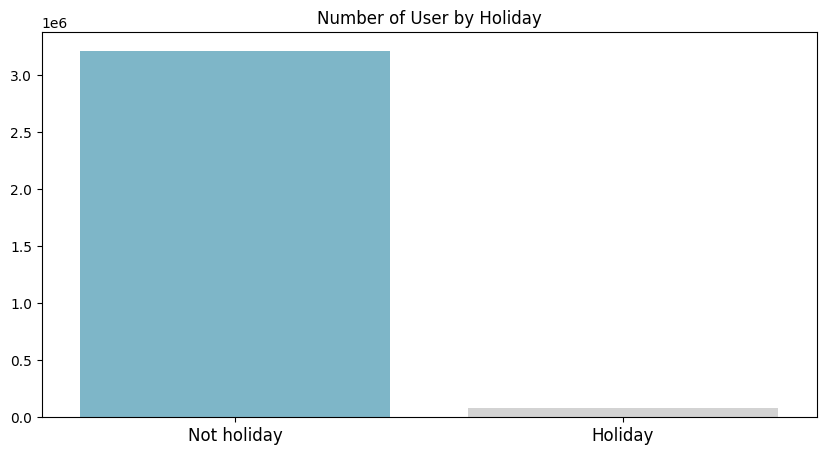

In [47]:
# Membuat plot jumlah user berdasarkan musim
colors = ["#72BCD4", "#D3D3D3"]
plt.figure(figsize=(10,5))
sns.barplot(x='holiday', y='number_of_user', data=by_holiday.sort_values('number_of_user', ascending=False), palette=colors)
plt.title('Number of User by Holiday')
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Berdasarkan grafik di atas, dapat dilihat bahwa user banyak menggunakan rental sepeda bukan saat liburan. Jumlah user sewa sepeda saat liburan sangat sedikit dibandingkan jumlah user sewa sepeda saat bukan liburan.

### Berdasarkan workingday

In [48]:
# Membuat dataframe jumlah user berdasarkan workingday
day_df = day_df.replace({'workingday' : {0 : 'Not workingday', 1 : 'Workingday'}})
by_workingday = day_df.groupby('workingday').cnt.sum().reset_index()
by_workingday.rename(columns={
   'cnt' : 'number_of_user'
}, inplace=True)
by_workingday

,workingday,number_of_user
0,Not workingday,1000269
1,Workingday,2292410


/var/folders/3n/jyv3jbjd2pb7zyf7y1f5j9xm0000gn/T/ipykernel_46776/3314774590.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workingday', y='number_of_user', data=by_workingday.sort_values('number_of_user', ascending=False), palette=colors)


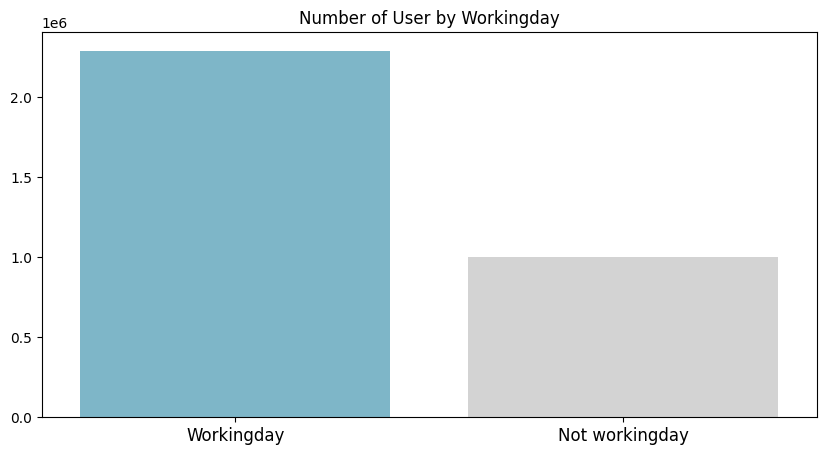

In [49]:
# Membuat plot jumlah user berdasarkan workingday
colors = ["#72BCD4", "#D3D3D3"]
plt.figure(figsize=(10,5))
sns.barplot(x='workingday', y='number_of_user', data=by_workingday.sort_values('number_of_user', ascending=False), palette=colors)
plt.title('Number of User by Workingday')
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Berdasarkan grafik di atas, jumlah user sewa sepeda paling banyak saat hari kerja, bukan saat akhir pekan ataupun liburan.

### Berdasarkan Cuaca

In [50]:
# Membuat dataframe jumlah user berdasarkan weathersit
day_df = day_df.replace({'weathersit' : {1 : 'clear and few clouds', 2 : 'mist and cloudy', 3 : 'light snow or rain', 4 : 'heavy rain'}})
by_weathersit = day_df.groupby('weathersit').cnt.sum().reset_index()
by_weathersit.rename(columns={
   'cnt' : 'number_of_user'
}, inplace = True)
by_weathersit

,weathersit,number_of_user
0,clear and few clouds,2257952
1,light snow or rain,37869
2,mist and cloudy,996858


/var/folders/3n/jyv3jbjd2pb7zyf7y1f5j9xm0000gn/T/ipykernel_46776/3579525068.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='number_of_user', data=by_weathersit.sort_values('number_of_user', ascending=False), palette=colors)


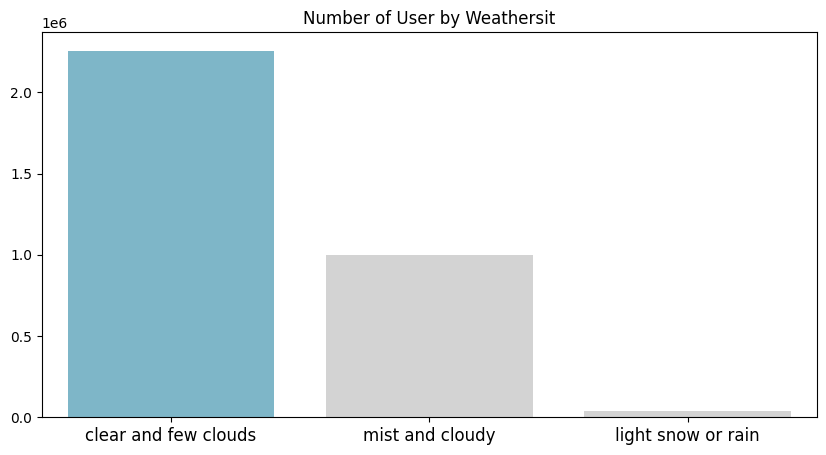

In [51]:
# Membuat plot jumlah user berdasarkan workingday
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3"]
plt.figure(figsize=(10,5))
sns.barplot(x='weathersit', y='number_of_user', data=by_weathersit.sort_values('number_of_user', ascending=False), palette=colors)
plt.title('Number of User by Weathersit')
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Berdasarkan grafik di atas, jumlah user yang menggunakan sewa sepeda paling banyak saat cuaca cerah dan sedikit berawan dan tidak ada user yang menggunakan sewa sepeda saat cuaca sedang hujan deras.

### Berdasarkan Indikator Cuaca

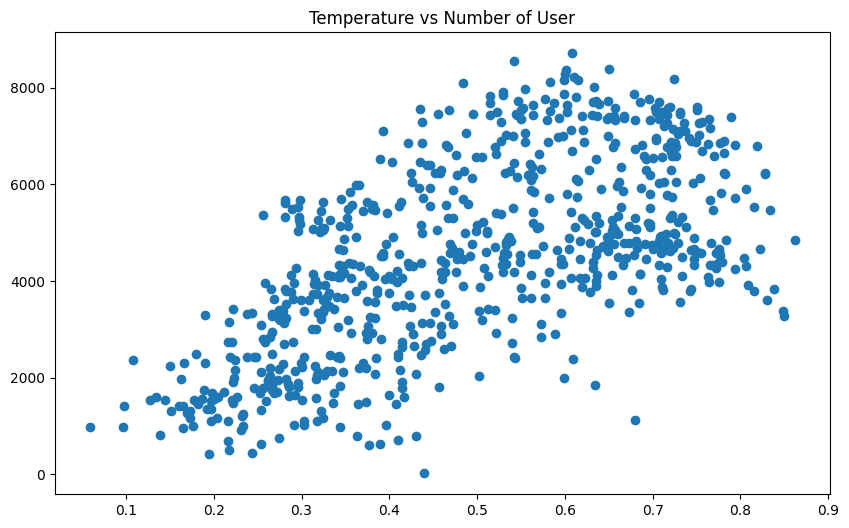

In [52]:
# Membuat plot Temperature terhadap jumlah user
plt.figure(figsize=(10,6))
plt.scatter(day_df['temp'], day_df['cnt'])
plt.title('Temperature vs Number of User')
plt.show()

Berdasarkan plot di atas, terdapat hubungan linear antara suhu dengan jumlah user dalam menggunakan sewa sepeda dimana semakin hangat suhu semakin banyak user menggunakan rental sepeda walaupun tidak semuanya, sehingga suhu sedikit mempengaruhi jumlah user dalam menggunakan sewa sepeda.

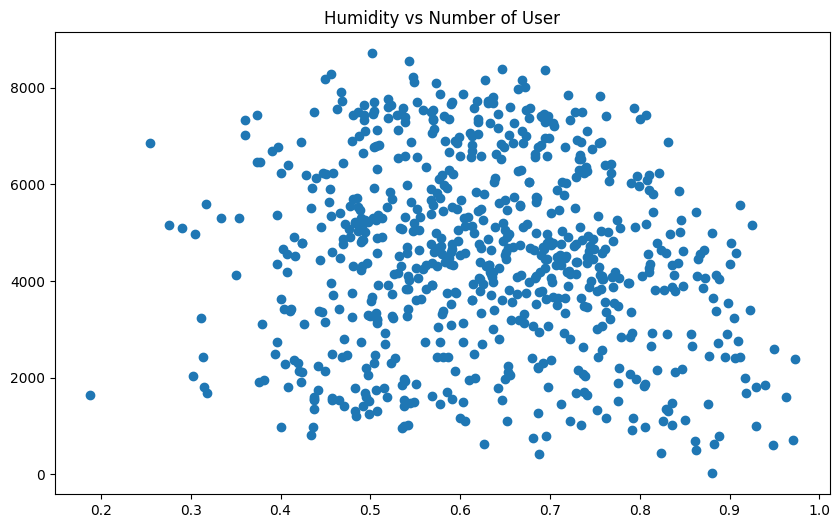

In [53]:
# Membuat plot humidity terhadap jumlah user
plt.figure(figsize=(10,6))
plt.scatter(day_df['hum'], day_df['cnt'])
plt.title('Humidity vs Number of User')
plt.show()

Berdasarkan plot di atas, tidak ada hubungan linear antara kelembapan terhadap jumlah user dalam menggunakan sewa sepeda, sehingga kelembapan tidak mempengaruhi jumlah user dalam menggunakan sewa sepeda.

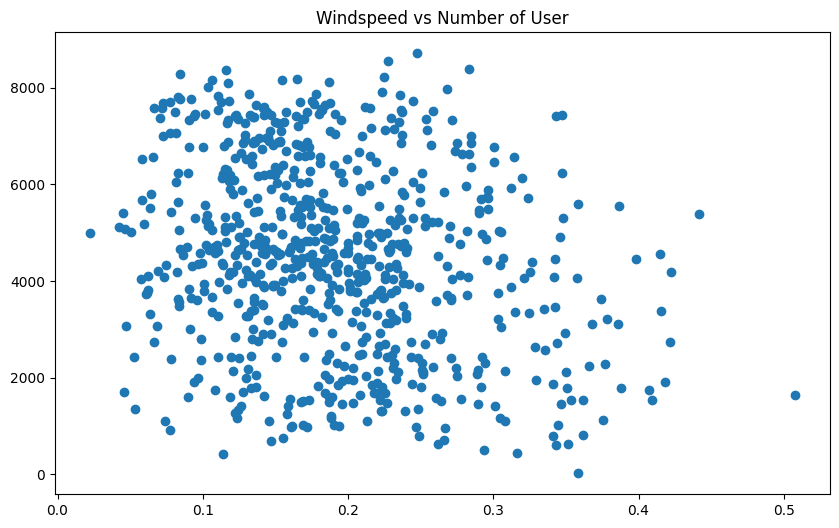

In [54]:
# Membuat plot windspeed terhadap jumlah user
plt.figure(figsize=(10,6))
plt.scatter(day_df['windspeed'], day_df['cnt'])
plt.title('Windspeed vs Number of User')
plt.show()

Berdasarkan plot di atas, tidak ada hubungan linear antara kecepatan angin terhadap jumlah user dalam menggunakan sewa sepeda, sehingga kecepatan angin tidak mempengaruhi jumlah user dalam menggunakan rental sepeda.

### Pertanyaan 3: Berapa jam waktu yang paling banyak dihabiskan oleh user menggunakan sewa sepeda?

In [64]:
# Membuat dataframe jumlah user berdasarkan jam
by_hour = hour_df.groupby('hr').cnt.sum().reset_index()
by_hour.rename(columns={
   'cnt' : 'number_of_user'
}, inplace = True)
by_hour

,hr,number_of_user
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428
5,5,14261
6,6,55132
7,7,154171
8,8,261001
9,9,159438


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


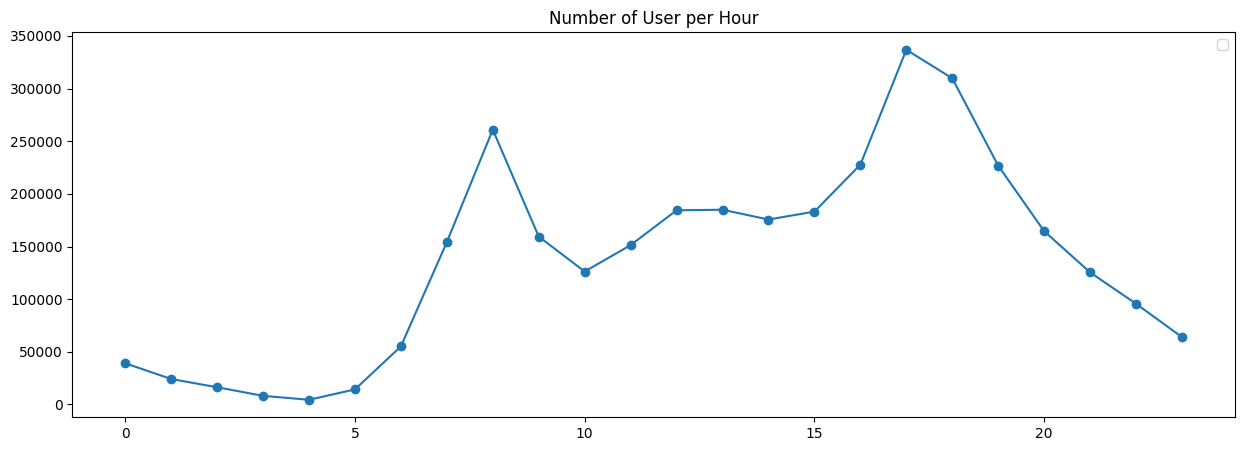

In [67]:
# Membuat plot jumlah user berdasarakan jam
plt.figure(figsize=(15,5))
plt.plot(by_hour['hr'], by_hour['number_of_user'], marker='o')
plt.title('Number of User per Hour')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
plt.show()

Berdasarkan grafik di atas, dapat dilihat bahwa jumlah jam yang paling banyak dihabiskan user untuk menggunakan sewa sepeda adalah 17 jam.

### Pertanyaan 4: Bagaimana jumlah user sewa sepeda berdasarkan jenis keanggotaannya? 

Untuk mengetahui bagaimana jumlah user sewa sepeda berdasarkan jenisnya dapat dilakukan dengan melakukan analisis lanjutan berdasarkan jenis keanggotaannya, dimana terdapat dua jenis user yaitu casual dan registered. 

In [ ]:
# Membuat dataframe jumlah user casual dan registerd pada setiap musim
user_by_season = day_df.groupby('season').agg({
                     'casual': 'sum',
                     'registered': 'sum'
})
user_by_season

,casual,registered
season,,
Fall,226091,835038
Spring,60622,410726
Summer,203522,715067
Winter,129782,711831


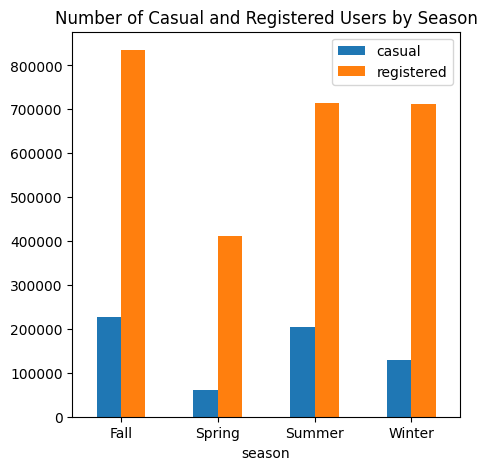

In [ ]:
# Membuat plot jumlah user casual dan registerd pada setiap musim
user_by_season.plot(kind='bar', figsize=(5,5), title='Number of Casual and Registered Users by Season', rot=0)
plt.show()


Berdasarkan plot di atas, jumlah user paling banyak di setiap musim adalah *registered user*. Baik *casual user* ataupun *registerd user* paling banyak menggunakan sewa sepeda pada saat musim gugur.

In [ ]:
# Membuat dataframe jumlah user casual dan registered pada saat waktu liburan dan bukan liburan
user_by_holiday = day_df.groupby('holiday').agg({
   'casual': 'sum',
   'registered': 'sum'
})
user_by_holiday

,casual,registered
holiday,,
Holiday,22359,56076
Not holiday,597658,2616586


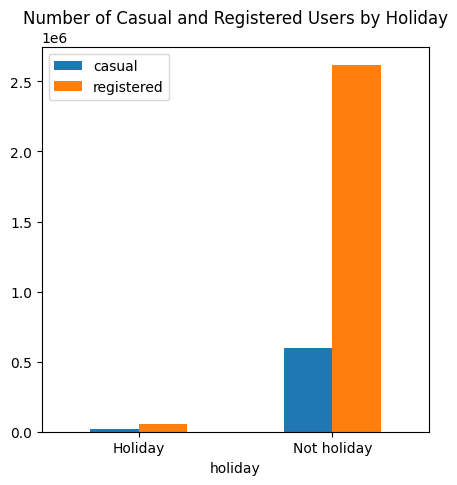

In [ ]:
# Membuat plot jumlah user casual dan registerd pada saat waktu liburan dan bukan liburan
user_by_holiday.plot(kind='bar', figsize=(5,5), title='Number of Casual and Registered Users by Holiday', rot=0)
plt.show()

Berdasarkan plot di atas, jumlah user paling banyak adalah *registered user*. Baik *casual user* ataupun *registered user* paling banyak menggunakan sewa sepeda pada saat bukan liburan.

In [ ]:
# Membuat dataframe jumlah user casual dan registered pada saat hari kerja dan bukan hari kerja
user_by_workingday = day_df.groupby('workingday').agg({
   'casual': 'sum',
   'registered': 'sum'
})
user_by_workingday

,casual,registered
workingday,,
Not workingday,316732,683537
Workingday,303285,1989125


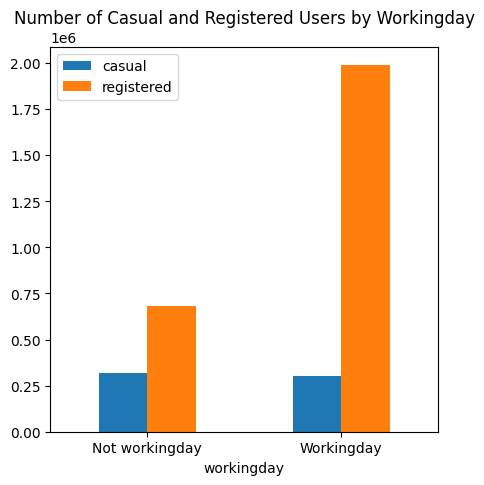

In [ ]:
# Membuat plot jumlah user casual dan registerd pada saat hari kerja dan bukan hari kerja
user_by_workingday.plot(kind='bar', figsize=(5,5), title='Number of Casual and Registered Users by Workingday', rot=0)
plt.show()

Berdasarkan plot di atas, jumlah user paling banyak adalah *registered user*. Berdasarkan hari kerja, *casual user* paling banyak menggunakan sewa sepeda saat akhir pekan atau hari libur, sedangkan  *registered user* paling banyak menggunakan sewa sepeda pada saat hari kerja.

In [ ]:
# Membuat dataframe jumlah user casual dan registered pada setiap cuaca
user_by_weathersit =  day_df.groupby('weathersit').agg({
   'casual': 'sum',
   'registered': 'sum'
})
user_by_weathersit

,casual,registered
weathersit,,
clear and few clouds,446346,1811606
light snow or rain,3895,33974
mist and cloudy,169776,827082


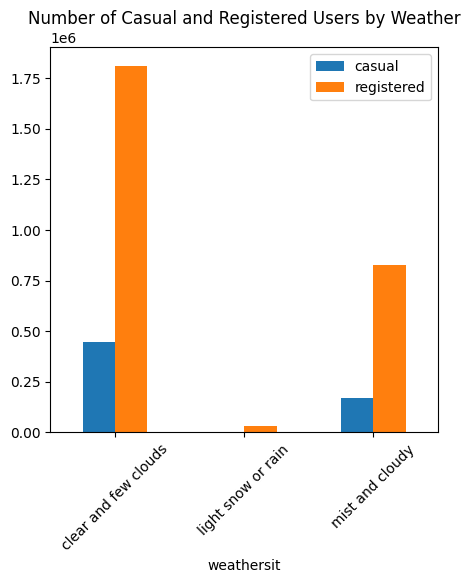

In [ ]:
# Membuat plot jumlah user casual dan registerd pada setiap cuaca
user_by_weathersit.plot(kind='bar', figsize=(5,5), title='Number of Casual and Registered Users by Weather', rot=45)
plt.show()

Berdasarkan plot di atas, jumlah user paling banyak di setiap cuaca adalah *registered user*. Baik *casual user* ataupun *registered user* paling banyak menggunakan sewa sepeda pada saat cuaca cerah dan sedikit berawan.

## Conclusion

Berdasarkan analisis data yang telah dilakukan dapat disimpulkan:

- Performa jumlah sewa sepeda selama satu tahun terakhir mengalami naik turun dimana jumlah sewa sepeda paling tinggi ada di bulan September, kemudian mengalami penurunan terus menerus di bulan Oktober sampai desember.
- Orang-orang paling banyak menggunakan sewa sepeda di musim gugur, saat hari kerja, serta cuaca cerah dan sedikit berawan. 
- Waktu yang paling banyak dihabiskan oleh user untuk menggunakan sewa sepeda adalah 17 jam.
- Berdasarkan jenis keanggotaan user, jenis user yang paling banyak menggunakan sewa sepeda saat berbagai musim, hari, dan juga cuaca adalah *registered_user*.